In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

In [3]:
import pandas_datareader.data as web
import pandas as pd

# Establece las fechas de inicio y fin para la descarga de datos
start_date = '2019-08-27'
end_date = '2024-08-27'

# Descarga los datos del S&P 500 desde FRED
sp500_data = web.DataReader('SP500', 'fred', start_date, end_date)
# Calcula los retornos diarios del S&P 500 y luego resamplea a mensual tomando el último valor
sp500_returns = sp500_data.pct_change().resample('M').last()

# Descarga los datos de Personal Consumption Expenditures desde FRED
pce_data = web.DataReader('PCE', 'fred', start_date, end_date)
# Calcula los retornos interanuales de PCE
pce_returns = pce_data.pct_change(12).resample('M').last()

# Descarga los datos del bono del Tesoro a 10 años
ten_year_bond = web.DataReader('GS10', 'fred', start_date, end_date)
# Calcula los retornos diarios del bono del Tesoro a 10 años y resamplea a mensual tomando el último valor
ten_year_bond_returns = ten_year_bond.pct_change().resample('M').last()

# Combina los tres dataframes
combined_data = pd.concat([sp500_returns, pce_returns, ten_year_bond_returns], axis=1)
combined_data.columns = ['S&P 500 Returns', 'PCE Returns', '10-Year Bond Returns']

# Muestra los primeros registros para verificar
print(combined_data.head())


C:\Users\jhers\AppData\Local\Temp\ipykernel_21300\888208587.py:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sp500_returns = sp500_data.pct_change().resample('M').last()
C:\Users\jhers\AppData\Local\Temp\ipykernel_21300\888208587.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sp500_returns = sp500_data.pct_change().resample('M').last()
C:\Users\jhers\AppData\Local\Temp\ipykernel_21300\888208587.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pce_returns = pce_data.pct_change(12).resample('M').last()


            S&P 500 Returns  PCE Returns  10-Year Bond Returns
DATE                                                          
2019-08-31         0.000643          NaN                   NaN
2019-09-30         0.005048          NaN                   NaN
2019-10-31        -0.003023          NaN              0.005882
2019-11-30        -0.004011          NaN              0.058480
2019-12-31         0.002946          NaN              0.027624


C:\Users\jhers\AppData\Local\Temp\ipykernel_21300\888208587.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ten_year_bond_returns = ten_year_bond.pct_change().resample('M').last()


In [6]:
combined_data = combined_data[13:-2]
combined_data

,S&P 500 Returns,PCE Returns,10-Year Bond Returns
DATE,,,
2020-09-30,0.008254,0.005812,0.046154
2020-10-31,-0.012130,0.007430,0.161765
2020-11-30,-0.004595,-0.000415,0.101266
2020-12-31,0.006439,0.003553,0.068966
2021-01-31,-0.019312,0.015979,0.161290
2021-02-28,-0.004750,0.010152,0.166667
2021-03-31,0.003623,0.137714,0.277778
2021-04-30,-0.007195,0.300840,0.018634
2021-05-31,0.000000,0.203657,-0.012195


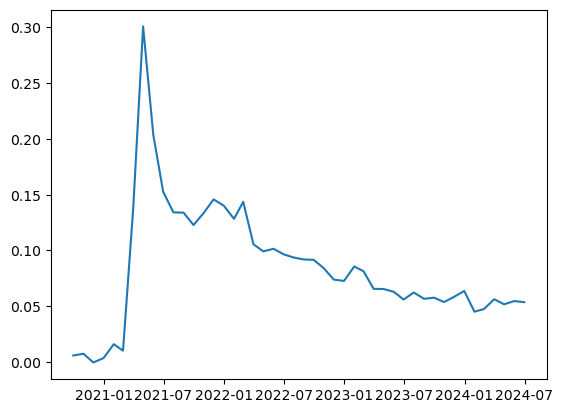

In [7]:
plt.plot(combined_data["PCE Returns"])

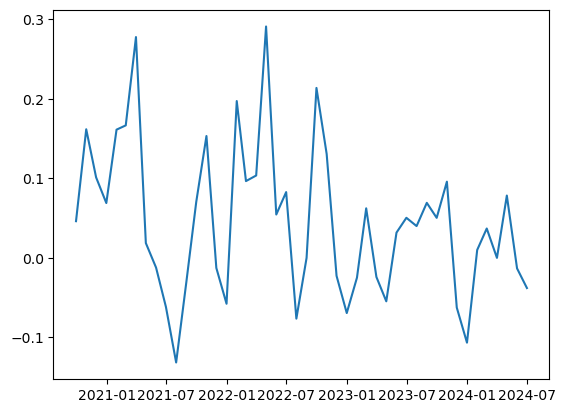

In [24]:
plt.plot(combined_data["10-Year Bond Returns"])

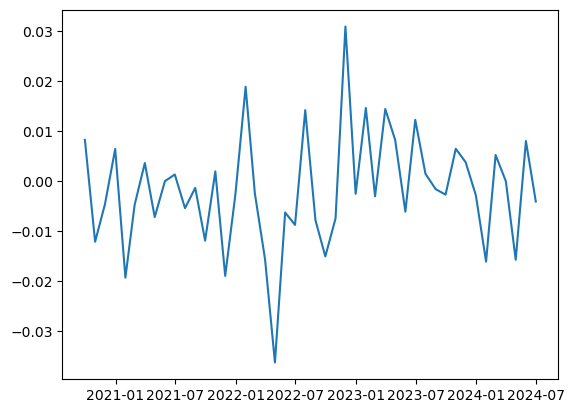

In [23]:
plt.plot(combined_data["S&P 500 Returns"])

In [ ]:

# Cargamos los datos y cambiamos los nombres de las columnas
datos1 = pd.read_excel('GMM_datos.xlsx', index_col='Date')
datos1.columns = ['AC_t', 'r_e', '10y']

In [53]:
datos1 = np.random.randn(39,3)
datos1.columns = ['AC_t', 'r_e', '10y']

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [46]:
np.array(datos1)

array([[ 8.25370937e-03,  6.82898678e-03,  4.61538462e-02],
       [-1.21295063e-02,  8.12534284e-03,  1.61764706e-01],
       [-4.59548971e-03, -1.90753887e-04,  1.01265823e-01],
       [ 6.43883774e-03,  4.10411565e-03,  6.89655172e-02],
       [-1.93115029e-02,  1.56320660e-02,  1.61290323e-01],
       [-4.75016582e-03,  9.28382858e-03,  1.66666667e-01],
       [ 3.62253856e-03,  1.35184514e-01,  2.77777778e-01],
       [-7.19463750e-03,  2.96508918e-01,  1.86335404e-02],
       [ 0.00000000e+00,  1.99118584e-01, -1.21951220e-02],
       [ 1.32811408e-03,  1.48384199e-01, -6.17283951e-02],
       [-5.40601699e-03,  1.30604616e-01, -1.31578947e-01],
       [-1.34914624e-03,  1.30104516e-01, -3.03030303e-02],
       [-1.19097319e-02,  1.18996929e-01,  7.03125000e-02],
       [ 1.94934318e-03,  1.29998300e-01,  1.53284672e-01],
       [-1.89613062e-02,  1.40762343e-01, -1.26582278e-02],
       [-2.62622077e-03,  1.34943047e-01, -5.76923077e-02],
       [ 1.88860183e-02,  1.22367468e-01

En el stochastic discount factor tenemos dos parámetros, r y β, pero solo estamos utilizando una ecuación, la serie de los retornos de la BVL. Con solo una serie, solo podemos identificar un parámetro en el mejor de los casos. Por este motivo, debemos fijar el valor de alguno de los parámetros.

Como queremos ver estimar el valor de r, vamos a fijar un valor para β que sea consistente con la teoría que hemos estado viendo.


In [40]:
# Fijamos el valor de β
β = 0.96

In [33]:
# Definimos nuestra función que vamos a utilizar
def GMM1(gamma):
    y = gamma  # Este valor se da a la función como initial guess
    sdf = β * datos1['AC_t']**(-y)
    f = sdf * datos1['r_e'] - 1
    T = len(f)
    V = np.linalg.inv(np.cov(f.T))
    V = np.eye(len(f))
    g = sum(f) / T
    return g**2

In [41]:
# Hacemos un initial guess para y y usamos la función fmin
gamma1 = 100
xopt1 = optimize.fmin(GMM1, gamma1, xtol=1e-12)

C:\Users\HP SUPPORT\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [ ]:
# Extraemos los resultados del primer paso
estimated_y1 = xopt1[0]

In [ ]:
# Mostramos nuestros resultados
print(f'Nuestro y estimado tiene un valor de {estimated_y1:.3f} (del "first-stage" GMM).')


In [ ]:
# Preparamos los datos que vamos a usar ahora
datos2 = datos1.dropna()

# Definimos la función GMM2 que vamos a usar ahora
def GMM2(parameter):
    p = parameter[0]  # Initial guess para nuestro β
    y = parameter[1]  # Initial guess para nuestro y
    sdf = p * datos2['AC_t']**(-y)
    f1 = sdf * datos2['r_e'] - 1
    f2 = sdf * datos2['10y'] - 1
    f = np.array([f1, f2]).T
    T = len(f)
    V = np.eye(len(f))
    g = sum(f) / T
    return g.T @ V @ g

In [ ]:
# Elegimos parámetros iniciales
param2 = [100, 1]

# Usamos la función fmin para estimar β y γ
xopt2 = optimize.fmin(GMM2, param2, xtol=1e-12)

# Extraemos los resultados
estimated_β = xopt2[0]
estimated_y = xopt2[1]

# Imprimimos los resultados
print(f'Nuestro β estimado es {estimated_β:.3f} y nuestro γ estimado es {estimated_y:.3f} (del "first-stage" GMM).')